In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

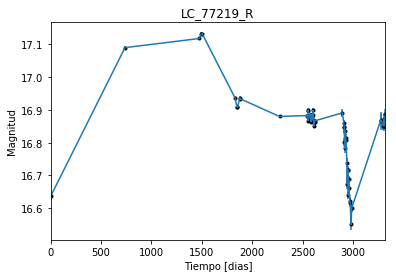

In [2]:
data = np.genfromtxt('LC_77219_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_77219_R')
plt.savefig("LC_77219_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

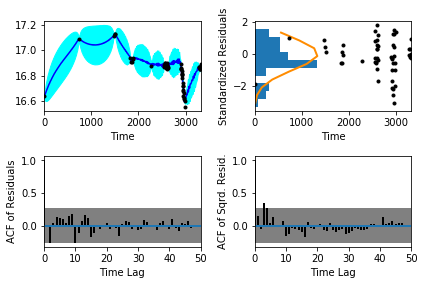

In [5]:
sample.assess_fit()

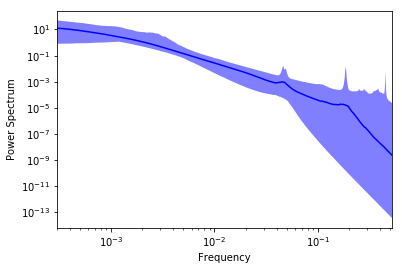

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

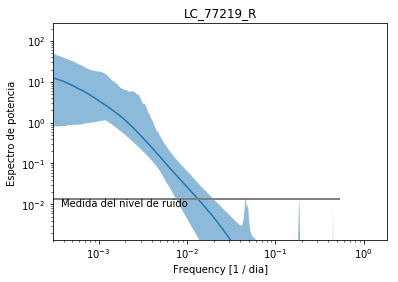

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_77219_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_77219_R')

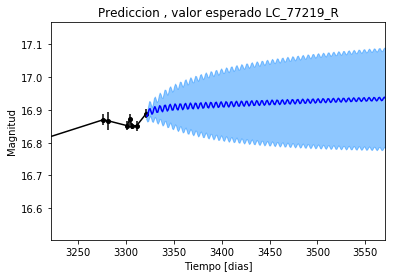

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_77219_R')

Text(0.5,1,'Prediccion, Caminos simulados LC_77219_R')

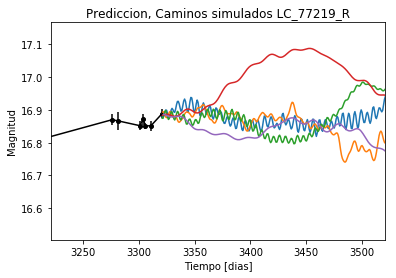

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_77219_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


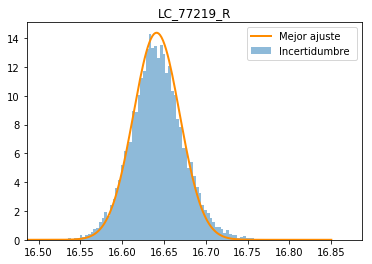

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_77219_R')
plt.savefig("Mejor_ajuste_LC_77219_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_77219_R')

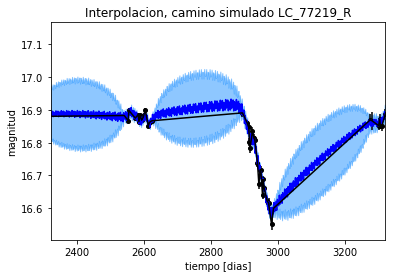

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_77219_R')

Text(0.5,1,'Interpolacion, camino simulado LC_77219_R')

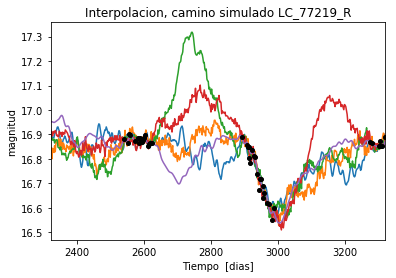

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_77219_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 408.629390063
Median: 0.00271130500257
Standard deviation: 0.128464621735
68% credibility interval: [ 0.00056342  0.06564602]
95% credibility interval: [  3.33021078e-04   4.85746395e-01]
99% credibility interval: [  3.08442267e-04   7.91190610e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 289.933820013
Median: 0.00227617372914
Standard deviation: 0.079522738966
68% credibility interval: [ 0.00053827  0.0475345 ]
95% credibility interval: [ 0.0003278   0.24991289]
99% credibility interval: [  3.08388542e-04   5.55066617e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 293.189634924
Median: 0.016150418196
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 185.264063314
Median: 128.180931522
Standard deviation: 2.70039686707
68% credibility interval: [ 125.41440535  130.61184613]
95% credibility interval: [ 122.3963261   133.15930338]
99% credibility interval: [ 120.24469134  134.07140218]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 301.535515142
Median: 0.21080308908
Standard deviation: 2.02724934709
68% credibility interval: [ 0.0350588   2.64946011]
95% credibility interval: [ 0.01552062  7.29326481]
99% credibility interval: [  0.01073732  10.06840069]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 239.208630093
Median: 1.39539932508
Standard deviation: 8.81865904571
68% credibility interval: [ 0.09271794  9.15502101]
95% credibility interval: [  0.07699945  3

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 4065.87600605
Median: 3.03642752588e-17
Standard deviation: 4.35282855205e+65
68% credibility interval: [  6.88485406e-72   9.54446250e-03]
95% credibility interval: [  1.25555623e-98   5.01762014e+01]
99% credibility interval: [  2.01926932e-113   3.40486439e+032]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1071.23859434
Median: 16.8877655591
Standard deviation: 0.0778306208878
68% credibility interval: [ 16.82171084  16.95872865]
95% credibility interval: [ 16.73414146  17.04614863]
99% credibility interval: [ 16.6728544   17.12092561]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 503.853475852
Median: 0.186323993084
Standard deviation: 0.224999066644
68% credibility interval: [ 0.04627229  0.45124698]
95% credibility interval: [ 0.          0.88705492]
99% credibility interval: [ 0.          0.98395534]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 503.853475852
Median: 0.186323993084
Standard deviation: 0.224999066644
68% credibility interval: [ 0.04627229  0.45124698]
95% credibility interval: [ 0.          0.88705492]
99% credibility interval: [ 0.          0.98395534]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 119.444230294
Median: 0.0
Standard deviation: 0.000799178797742
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 185.264063314
Median: 128.180931522
Standard deviation: 2.70039686707
68% credibility interval: [ 125.41440535  130.61184613]
95% credibility interval: [ 122.3963261   133.15930338]
99% credibility interval: [ 120.24469134  134.07140218]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 446.75706355
Median: 0.0286752342963
Standard deviation: 0.0261222251961
68% credibility interval: [ 0.01873015  0.05064363]
95% credibility interval: [ 0.01328918  0.09487296]
99% credibility interval: [ 0.01048996  0.17117882]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 365.864766134
Median: 1.35488315135
Standard deviation: 0.312839513532
68% credibility interval: [ 1.04300203  1.738393  ]
95% credibility interval: [ 0.84227954  1.9456058 ]
99% credibility interval: [ 0.72336885  1.98919965]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 983.782096288
Median: 0.00219876705694
Standard deviation: 0.197086083774
68% credibility interval: [  3.62885921e-05   5.23224000e-02]
95% credibility interval: [  1.89993513e-05   5.63538794e-01]
99% credibility interval: [  2.23280638e-35   1.41997275e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 408.629390063
Median: (-0.0170356317554-1.19105398277j)
Standard deviation: 1.6279118263
68% credibility interval: [-0.41246612-0.24720818j -0.00354008-0.29749377j]
95% credibility interval: [ -3.05203461e+00+0.j          -2.09243314e-03-0.29693171j]
99% credibility interval: [ -4.97119722e+00+0.j          -1.93799992e-03-1.16120823j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 289.933820013
Median: (-0.0143016213315+0.28909322707j)
Standard deviation: 1.4994113956
68% credibility interval: [-0.29866805+2.1370813j  -0.00338203+1.16565366j]
95% credibility interval: [-1.57024901+0.80040684j -0.00205961+0.27495732j]
99% credibility interval: [ -3.48758641e+00+4.25173658j  -1.93766236e-03+0.00435545j]
Posterior summar